# 서울시 범죄 분석 및 시각화를 위한 사전 공부
##  pandas.pivot_table() 공부

- [chris1610 님의 깃허브 자료](https://github.com/chris1610/pbpython/tree/master/data)에서 sales-funnel.xlsx 파일을 다운로드
- funnel analysis 소개: [회의 시간에 당황하지 않게 만들어줄 마케팅 용어 정리 – 2탄!](https://media.fastcampus.co.kr/knowledge/marketing-term-2/)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# funnel(깔때기)은 마케팅에서 소비자를 고객으로 이끌어 내는 과정’이란 의미
df = pd.read_excel("./sales-funnel.xlsx")  # pd.pivot_table() 공부를 위한 데이터 파일 읽기
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [3]:
# 열 이름 변경 및 '금액' 열 추가
df.rename(columns={'Account': '고객계정', 'Name': '고객이름', 'Rep': '영업사원', 'Manager': '영업팀장',
                   'Product': '제품', 'Quantity': '수량', 'Price': '단가', 'Status': '상태'},
          inplace=True)
df['금액'] = df['수량'] * df['단가']
df

,고객계정,고객이름,영업사원,영업팀장,제품,수량,단가,상태,금액
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented,30000
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented,10000
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending,10000
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined,35000
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won,130000
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending,80000
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented,10000
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending,10000
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined,35000
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won,130000


- 위 자료에서 영업팀장 항목으로 요약(!)해서 보고 싶다면, 판다스 pivot_table() 활용
    - 영업팀장 열이 index가 됨
    - 비수치 항목은 사라짐
    - 수치 항목은 평균값으로 요약됨

### index 활용하여 집계 단위 지정

In [4]:
# pivot_table()로 요약하면, 수치는 기본적으로 평균치로 처리됨
pd.pivot_table(df, index=["영업팀장"])  # 영업팀장을 pivot index로 지정, 
                                        # 고객계정 열은 (수치가 아니므로) 평균 계산이 무의미
                                        # 사실 단가와 수량에 대한 평균 계산도 큰 의미는 없음

,고객계정,금액,단가,수량
영업팀장,,,,
Debra Henley,513112.222222,38888.888889,26111.111111,1.444444
Fred Anderson,405039.000000,104500.000000,35875.000000,2.125000


In [5]:
# 직전 셀에서 판다스 데이터프레임의 실수 출력된 모습은 마음에 들지 않음
# 판다스 실수 출력 형식 지정 (한번 지정하면 이후 동일한 형식이 계속 지정됨)
pd.options.display.float_format = '{:,.2f}'.format  
# {:,.2f} -> 소수점 둘째자리까지만 출력하고, 콤마로 천단위 구분
# pd.options.display.int_format = '{:,d}'.format  # 그런데 정수형에 대한 int_format 정의는 없음 -> 정수형은 적용 불가능

In [6]:
# 앞서 판다스 실수 출력 형식을 지정했으므로, 출력 형식이 개선되었음
pd.pivot_table(df, index=["영업팀장"])

,고객계정,금액,단가,수량
영업팀장,,,,
Debra Henley,"513,112.22","38,888.89","26,111.11",1.44
Fred Anderson,"405,039.00","104,500.00","35,875.00",2.12


In [7]:
# 두 열을 pivot index 열로 지정
# 두 열에서 부모-자식 관계가 성립되어야 자연스러움
pd.pivot_table(df, index=["영업팀장", "영업사원"])  

고객계정         금액        단가   수량
영업팀장          영업사원                                              
Debra Henley  Craig Booker  720,237.00  21,250.00 20,000.00 1.25
              Daniel Hilton 194,874.00  73,333.33 38,333.33 1.67
              John Smith    576,220.00  22,500.00 20,000.00 1.50
Fred Anderson Cedric Moss   196,016.50  43,750.00 27,500.00 1.25
              Wendy Yule    614,061.50 165,250.00 44,250.00 3.00

In [8]:
# 세 열을 pivot index 열로 지정
# 세 열에서 부모-자식 관계가 연속적으로 성립되어야 자연스러움 -> 대분류 - 중분류 - 소분류 관계
pd.pivot_table(df, index=["영업팀장", "영업사원", "고객이름"])
# 실수가 아닌 정수 열에는 천 단위 구분 쉼표가 없음 -> 정수는 int_format 정의가 없어서 적용 불가능하기 때문

고객계정         금액  \
영업팀장          영업사원          고객이름                                              
Debra Henley  Craig Booker  Fritsch, Russel and Anderson  737550  35,000.00   
                            Trantow-Barrows               714466  16,666.67   
              Daniel Hilton Kiehn-Spinka                  146832 130,000.00   
                            Kulas Inc                     218895  45,000.00   
              John Smith    Barton LLC                    740150  35,000.00   
                            Jerde-Hilpert                 412290  10,000.00   
Fred Anderson Cedric Moss   Herman LLC                    141962 130,000.00   
                            Purdy-Kunde                   163416  30,000.00   
                            Stokes LLC                    239344   7,500.00   
              Wendy Yule    Kassulke, Ondricka and Metz   307599  21,000.00   
                            Keeling LLC                   688981 500,000.00   
                            Koepp Ltd                     729833  70,000.00   

                                                              단가   수량  
영업팀장          영업사원          고객이름                                       
Debra Henley  Craig Booker  Fritsch, Russel and Anderson   35000 1.00  
                            Trantow-Barrows                15000 1.33  
              Daniel Hilton Kiehn-Spinka                   65000 2.00  
                            Kulas Inc                      25000 1.50  
              John Smith    Barton LLC                     35000 1.00  
                            Jerde-Hilpert                   5000 2.00  
Fred Anderson Cedric Moss   Herman LLC                     65000 2.00  
                            Purdy-Kunde                    30000 1.00  
                            Stokes LLC                      7500 1.00  
              Wendy Yule    Kassulke, Ondricka and Metz     7000 3.00  
                            Keeling LLC                   100000 5.00  
                            Koepp Ltd                      35000 2.00

In [9]:
# df.style.format('{:,.2f}') 명령으로 모든 수치에 대하여 형식 지정하여 출력이 가능함 -> 정수형도 적용 가능
# 그런데 이 방식은 데이터프레임 출력할 때마다 형식을 매번 지정해야 함
pd.pivot_table(df, index=["영업팀장", "영업사원", "고객이름"]).style.format('{:,.2f}')

### values 활용하여 집계 대상 지정

In [10]:
# pivot_table()로 요약하면, 수치는 기본적으로 평균치로 처리됨
# pivot_table()로 요약하되, 수치를 평균치가 아닌 합계로 보려면 `aggfunc=np.sum` 옵션 지정
df_pvt = pd.pivot_table(df,
                        index=["영업팀장", "영업사원"],   # 영업팀장을 대분류로, 영업사원을 중분류로 지정
                        values=["금액", "수량"],          # 요약 통계치 대상을 지정, 요약의 대상은 금액과 수량
                        aggfunc=np.sum)                   # 요약 통계치 유형을 지정, 요약의 유형은 합계
df_pvt.style.format('{:,.1f}')  # df를 모두 실수형으로 지정, 소수점 한자리로 콤마를 포함해서 출력

In [11]:
df_pvt.style.format('{:,d}')  # df 출력 형식을 모두 정수형으로 지정 

In [12]:
df_pvt = pd.pivot_table(df,
                        index=["영업팀장", "영업사원"],   # 영업팀장을 대분류로, 영업사원을 중분류로 지정
                        values=["금액", "수량", "단가"],  # 요약 대상은 금액과 수량과 단가
                        aggfunc=[np.sum, np.mean, len])   # 요약 유형은 합계, 평균, 길이(갯수를 셈)
                                                          # 대상과 유형을 여러 개로 지정하면 각각에 대해서 모두 처리
df_pvt

sum                   mean                len  \
                                 금액      단가  수량         금액        단가   수량  금액   
영업팀장          영업사원                                                              
Debra Henley  Craig Booker    85000   80000   5  21,250.00 20,000.00 1.25   4   
              Daniel Hilton  220000  115000   5  73,333.33 38,333.33 1.67   3   
              John Smith      45000   40000   3  22,500.00 20,000.00 1.50   2   
Fred Anderson Cedric Moss    175000  110000   5  43,750.00 27,500.00 1.25   4   
              Wendy Yule     661000  177000  12 165,250.00 44,250.00 3.00   4   

                                   
                            단가 수량  
영업팀장          영업사원                 
Debra Henley  Craig Booker   4  4  
              Daniel Hilton  3  3  
              John Smith     2  2  
Fred Anderson Cedric Moss    4  4  
              Wendy Yule     4  4

In [13]:
df_pvt.style.format('{:,.1f}')  # 소수점 아래 한자리까지만 출력

### columns 활용하여 2차원 피봇

In [14]:
# (index/columns/values/aggfunc) 지정하여 2차원 피봇 테이블 작성
pd.pivot_table(df,
               index=["영업팀장", "영업사원"],  # 행(인덱스)
               columns=["제품"],                # 열 -> 제품(CPU / Maintenance / Monitor / Software)
               values=["금액"],                 # 요약 대상
               aggfunc=[np.sum])                # 요약 방식
# NaN 출력이 거슬림

sum                                
                                    금액                                
제품                                 CPU Maintenance   Monitor  Software
영업팀장          영업사원                                                    
Debra Henley  Craig Booker   65,000.00   10,000.00       nan 10,000.00
              Daniel Hilton 210,000.00         nan       nan 10,000.00
              John Smith     35,000.00   10,000.00       nan       nan
Fred Anderson Cedric Moss   160,000.00    5,000.00       nan 10,000.00
              Wendy Yule    630,000.00   21,000.00 10,000.00       nan

In [15]:
# (index/columns/values/aggfunc) 지정하여 2차원 피봇 테이블 작성하되, fill_value 지정
pd.pivot_table(df,
               index=["영업팀장", "영업사원"],
               columns=["제품"],
               values=["금액"],
               aggfunc=[np.sum],
               fill_value=0).style.format('{:,d}')  # `fill_value=0` 지정하여 NaN 값을 0으로 대치

In [16]:
pd.pivot_table(df,
               index=["영업팀장", "영업사원", "제품"],
               values=["금액", "수량", "단가"],
               aggfunc=[np.sum],
               fill_value=0)

sum           
                                             금액      단가 수량
영업팀장          영업사원          제품                            
Debra Henley  Craig Booker  CPU           65000   65000  2
                            Maintenance   10000    5000  2
                            Software      10000   10000  1
              Daniel Hilton CPU          210000  105000  4
                            Software      10000   10000  1
              John Smith    CPU           35000   35000  1
                            Maintenance   10000    5000  2
Fred Anderson Cedric Moss   CPU          160000   95000  3
                            Maintenance    5000    5000  1
                            Software      10000   10000  1
              Wendy Yule    CPU          630000  165000  7
                            Maintenance   21000    7000  3
                            Monitor       10000    5000  2

In [17]:
pd.pivot_table(df,
               index=["영업팀장", "영업사원", "제품"],
               values=["금액", "수량", "단가"],
               aggfunc=[np.sum],
               fill_value=0,
               margins=True)  # 총계 추가 여부 -> ALL 행이 추가됨

sum            
                                              금액      단가  수량
영업팀장          영업사원          제품                              
Debra Henley  Craig Booker  CPU            65000   65000   2
                            Maintenance    10000    5000   2
                            Software       10000   10000   1
              Daniel Hilton CPU           210000  105000   4
                            Software       10000   10000   1
              John Smith    CPU            35000   35000   1
                            Maintenance    10000    5000   2
Fred Anderson Cedric Moss   CPU           160000   95000   3
                            Maintenance     5000    5000   1
                            Software       10000   10000   1
              Wendy Yule    CPU           630000  165000   7
                            Maintenance    21000    7000   3
                            Monitor        10000    5000   2
All                                      1186000  522000  30

In [18]:
pd.pivot_table(df,
               index=["영업팀장", "영업사원", "제품"], # 인덱스는 대분류(영업팀장) - 중분류(영업사원) - 소분류(제품)로 지정
               values=["금액", "수량", "단가"],        # 집계 대상은 금액, 수량, 단가 (순서는 그대로 일치하지 않음)
               aggfunc=[np.sum, np.mean, len],         # 집계함수를 여러 개 지정 (합계, 평균, 길이)
               fill_value=0,                           # nan 값에는 0으로 대체
               margins=True).style.format('{:,.1f}')  # 총계 추가 여부

In [19]:
pd.pivot_table(df,
               index=["영업팀장", "영업사원", "제품"],
               values=["금액", "수량", "단가"],
               aggfunc={"금액": np.sum, "수량": np.sum, "단가": np.mean},  # 집계함수를 개별적으로 지정
               fill_value=0,
               margins=True).style.format('{:,.1f}')  # 총계 추가 여부

- 지금까지 [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) 공부

## seaborn 공부

- seaborn 메소드
    - seaborn.set_style(): 차트 스타일 정의
    - seaborn.load_dataset(): seaborn에서 제공하는 데이터셋 적재
    - seaborn.boxplot(): 박스 플롯
        ![](https://seaborn.pydata.org/_images/seaborn-boxplot-3.png)
    - seaborn.swarmplot(): 군단 플롯
        ![](https://seaborn.pydata.org/_images/seaborn-swarmplot-4.png)
    - seaborn.lmplot(): 산포도, 회귀선, 유효범위
        ![](https://seaborn.pydata.org/_images/seaborn-lmplot-5.png)
    - seaborn.heatmap(): 열 분포도
        ![](https://seaborn.pydata.org/_images/seaborn-heatmap-111.png)
    - seaborn.pairplot(): 상관분석도
        ![](https://seaborn.pydata.org/_images/pairplot_3_0.png)

- seaborn에서 제공하는 데이터 셋
    - tips: 식당에서 손님이 지불한 팁 통계 데이터
    - flights: 연도별 비행 통계 데이터
    - iris: 붓꽃에 대한 통계 데이터
    - anscombe: 간단한 요약 통계로 보면 동일하지만, 시각화하면 매우 다른 데이터 셋
        ![엔스컴 데이터 셋 시각화 결과](https://mblogthumb-phinf.pstatic.net/MjAxNzA5MDlfMjcx/MDAxNTA0ODg1ODIyMTky.dFOSFlEfQEf_w_dlyhLvZuNCIubRa8H6mWb0oKfLNAYg.Xhi6ujFTefsrKoMtKAdw8X7e4o8MYP6iLGAtjOhyzkog.PNG.datageeks/Anscombe_1_0.png?type=w800)
- 참고 자료
    - 데이터 사이언스 스쿨, [데이터 분포 시각화 도구](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)
    - nonameyet, [Seaborn 라이브러리를 활용한 데이터 시각화 튜토리얼](https://nonmeyet.tistory.com/entry/Python-seaborn을-사용한-데이터-시각화-1?category=779198)

### Seaborn 스타일 활용

In [20]:
# vnv_vd 가상환경에 이미 설치되어 있을 것이나, 혹시 아니라면 아래와 같이 설치
# 아래와 같은 명령으로 쥬피터 노트북 코드 셀에서 설치 가능함
# 아나콘다 파워 쉘 프롬프트에서 설치할 때에는 앞의 "!"를 빼고 명령을 입력해야 함
#!conda install seaborn -y

x = 
[ 0.          0.14141414  0.28282828  0.42424242  0.56565657  0.70707071
  0.84848485  0.98989899  1.13131313  1.27272727  1.41414141  1.55555556
  1.6969697   1.83838384  1.97979798  2.12121212  2.26262626  2.4040404
  2.54545455  2.68686869  2.82828283  2.96969697  3.11111111  3.25252525
  3.39393939  3.53535354  3.67676768  3.81818182  3.95959596  4.1010101
  4.24242424  4.38383838  4.52525253  4.66666667  4.80808081  4.94949495
  5.09090909  5.23232323  5.37373737  5.51515152  5.65656566  5.7979798
  5.93939394  6.08080808  6.22222222  6.36363636  6.50505051  6.64646465
  6.78787879  6.92929293  7.07070707  7.21212121  7.35353535  7.49494949
  7.63636364  7.77777778  7.91919192  8.06060606  8.2020202   8.34343434
  8.48484848  8.62626263  8.76767677  8.90909091  9.05050505  9.19191919
  9.33333333  9.47474747  9.61616162  9.75757576  9.8989899  10.04040404
 10.18181818 10.32323232 10.46464646 10.60606061 10.74747475 10.88888889
 11.03030303 11.17171717 11.31313131 11.45454545 

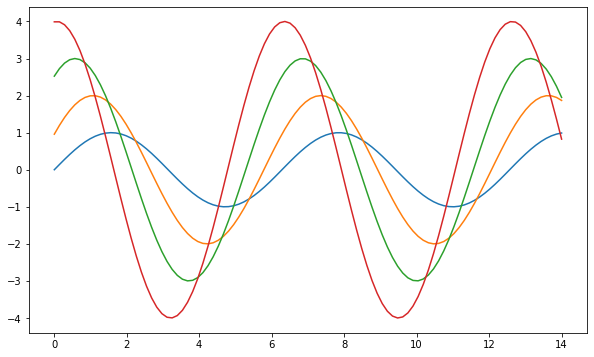

In [21]:
# <1> 순수하게 matplotlib 시각화
import matplotlib.pyplot as plt

# 노트북이 실행된 브라우저에서 직접 그림을 볼 수 있도록 지정하는 명령(생략 가능함)
# %matplotlib inline

x = np.linspace(0, 14, 100)  # x 축 값을 정의 (linear space) (시작값, 종료값, 개수) -> 0부터 14까지 범위를 100개로 자름
y1 = np.sin(x)               # y축 값을 정의 (파란색 파형)  # sin 함수
y2 = 2 * np.sin(x + 0.5)     # y축 값을 정의 (주황색 파형)
y3 = 3 * np.sin(x + 1.0)     # y축 값을 정의 (초록색 파형)
y4 = 4 * np.sin(x + 1.5)     # y축 값을 정의 (빨간색 파형)
print(f'x = \n{x}')
print(f'y1 = sin(x) = \n{y1}')
print(f'y2 = 2 * sin(x + 0.5) = \n{y2}')

# matplotlib.pyplot으로 사인 커브 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y1,
         x, y2,
         x, y3,
         x, y4,
        )
plt.show()

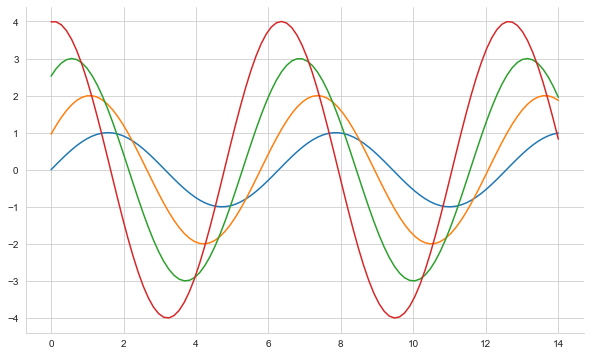

In [22]:
# <2> Seaborn 스타일 활용 (직전 <1>은 Seaborn에서 "white" 스타일에, despline() 적용하지 않은 상태)
import seaborn as sns

# Seaborn 활용하여 스타일을 지정하면, matplotlib 스타일이 변경됨 (모든 스타일을 시도해 보자.)
sns.set_style("whitegrid")  # darkgrid(기본값), whitegrid, dark, white, ticks

plt.figure(figsize=(10, 6))
plt.plot(x, y1,
         x, y2,
         x, y3,
         x, y4,
         )
                # spine(척추)을 제거한다는 의미, 우단과 상단의 테두리가 없어짐
sns.despine()   # sns.despine() 호출은 plt.plot() 호출된 이후에만 효과를 발휘함
plt.show()

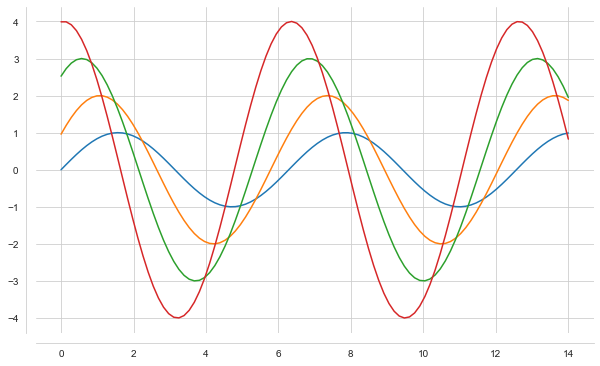

In [23]:
# <3> Seaborn에서 축 offset 지정
plt.figure(figsize=(10, 6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine(offset=10)      # 두 축으로부터 10 points 이동 -> 원점에서 살짝 떨어짐
plt.show()

### Seaborn 박스플롯

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

- seaborn에서 제공하는 tips 데이터셋
     - 식당에서 손님이 종업원에게 지급한 팁에 관한 데이터 집합
     - (total_bill, tip, sex, smoker, day, time, size)
        = (총액, 팁, 성별, 흡연여부, 요일, 시간, 인원)
     - seaborn_tips_dataset https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset


In [25]:
tips = sns.load_dataset("tips")  # tips 데이터 자동으로 전달
print(tips.shape)
tips

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
tips.describe()  # 요약된 통계치 확인

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [27]:
tips[tips['total_bill'] < 10.00]  # 총액이 10달러 미만인 데이터만 출력

,total_bill,tip,sex,smoker,day,time,size
6,8.77,2.00,Male,No,Sun,Dinner,2
30,9.55,1.45,Male,No,Sat,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
126,8.52,1.48,Male,No,Thur,Lunch,2
135,8.51,1.25,Female,No,Thur,Lunch,2
145,8.35,1.50,Female,No,Thur,Lunch,2


### tips 데이터셋 분포 확인

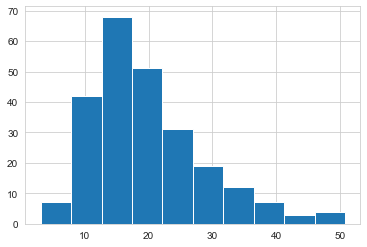

In [28]:
# plt.xlim(0, 60)
plt.hist(tips["total_bill"])             # plt.hist()
# plt.hist(tips["total_bill"], bins=14)  # plt.hist()
plt.show()

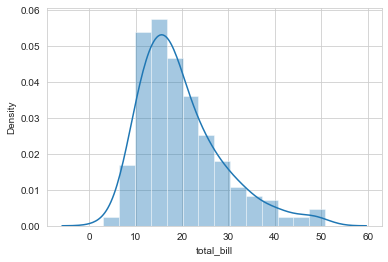

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # 경고 메시지 출력 안하게 억제

sns.distplot(tips["total_bill"])  # sns.distplot()
plt.show()
# 차트 상단에 어정쩡한 선 없애는 법은 y축의 눈금 범위를 지정해주면 됨. (ylim)

### sns.boxplot()

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

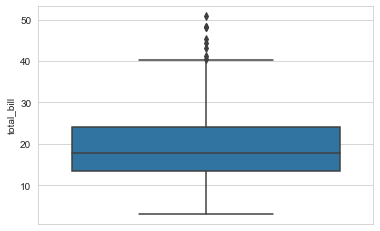

In [30]:
sns.set_style("whitegrid")

# 1. 총액에 대한 박스플롯

# sns.boxplot(x=tips["total_bill"])  # 총액에 대한 boxplot 그리기 (x값만 지정하면 수평으로, y값만 지정하면 수직으로 그려짐)
# sns.boxplot(x="total_bill", data="tips")  # 데이터를 지정하는 방식은 x와 y를 함께 지정할 때만 씀. 때문에 오류 발생
sns.boxplot(y=tips["total_bill"])  # 총액에 대한 boxplot 그리기

plt.show()

# seaborn.boxplot에서 이상치를 판정하는 기준은 사분위 범위(Q3 - Q1)의 1.5배 로 설정되어 있음
# sns.boxplot(x=tips["total_bill"], whis=1.5)  # whis는 박스 좌우에 있는 직선을 말함
# sns.boxplot(x=tips["total_bill"], whis=3.0)

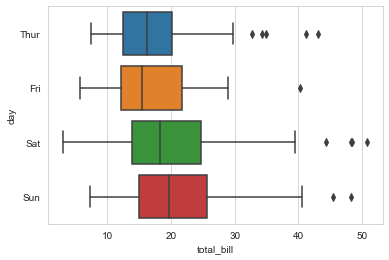

In [31]:
# 2. 요일별로 총액에 대한 박스플롯

sns.boxplot(y="day", x="total_bill", data=tips)  # 요일별로 boxplot 그리기, x와 y 둘 다 지정하면 데이터 지정 가능
# sns.boxplot(x="day", y="total_bill", data=tips)  # 요일별로 boxplot 그리기
plt.show()

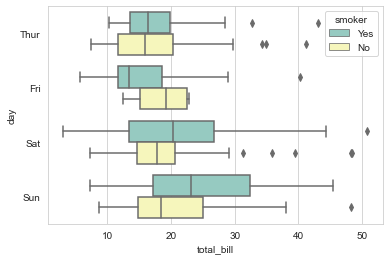

In [32]:
# 3. 요일별로 총액에 대한 박스플롯 (흡연자와 비흡연자를 구분하여)

# plt.figure(figsize=(8,6))

# hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게
sns.boxplot(y="day", x="total_bill", hue="smoker", data=tips, palette="Set3")  # 팔레트 지정하여 색상 변경
# sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

# 흡연 여부에 따라 총액이 달라질까? (시각화 결과로 보면 그러한 듯...)

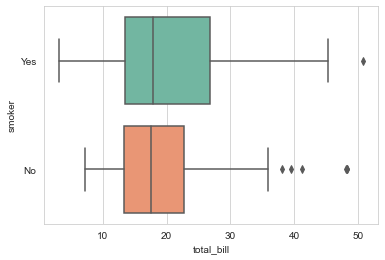

In [33]:
# 4. 흡연 여부별로 총액에 대한 박스플롯

# plt.figure(figsize=(8,6))

# hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게
sns.boxplot(y="smoker", x="total_bill", data=tips, palette="Set2")
# sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

In [34]:
# yes인 값만 추출 -> 흡연자들의 총액을 출력
tips[tips.smoker ==  'Yes'].total_bill

56    38.01
58    11.24
60    20.29
61    13.81
62    11.02
       ... 
234   15.53
236   12.60
237   32.83
240   27.18
241   22.67
Name: total_bill, Length: 93, dtype: float64

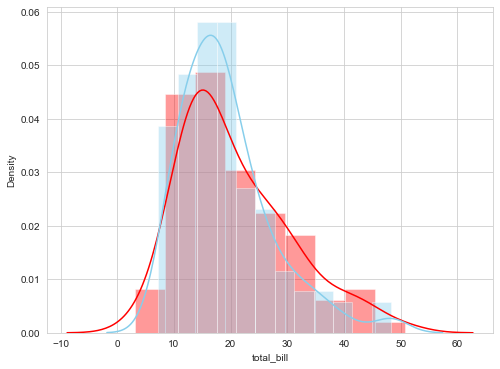

In [35]:
# 4. 흡연 여부별로 총액에 대한 박스플롯

plt.figure(figsize=(8,6))

sns.distplot(tips[tips.smoker ==  'Yes'].total_bill, color='red', label='smoker')
sns.distplot(tips[tips.smoker ==  'No'].total_bill, color='skyblue', label='non-smoker')
plt.show()

### sns.swarmplot()

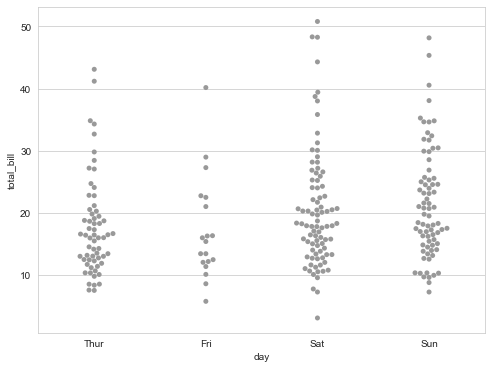

In [36]:
plt.figure(figsize=(8,6))
# swarm은 군단이란 의미이며, swarmplot은 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동
sns.swarmplot(x="day", y="total_bill", data=tips, color=".6")   # color 수치가 1에 근접할수록 연하게
plt.show()

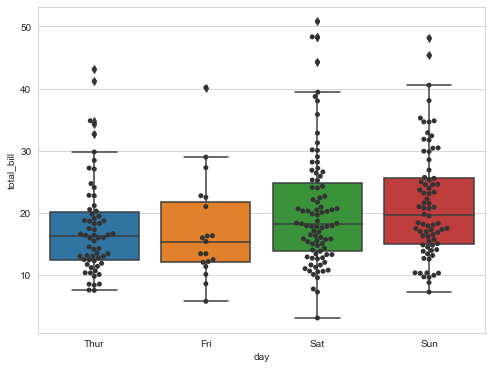

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".2")  # color 수치가 0에 근접할수록 진하게
plt.show()

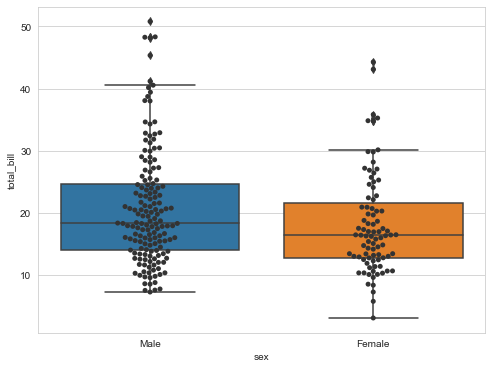

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="total_bill", data=tips)
sns.swarmplot(x="sex", y="total_bill", data=tips, color=".2")  # color 수치가 0에 근접할수록 진하게
plt.show()

Codecademy, [Seaborn Styling, Part 2: Color](https://www.codecademy.com/articles/seaborn-design-ii)

### sns.lmplot()

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


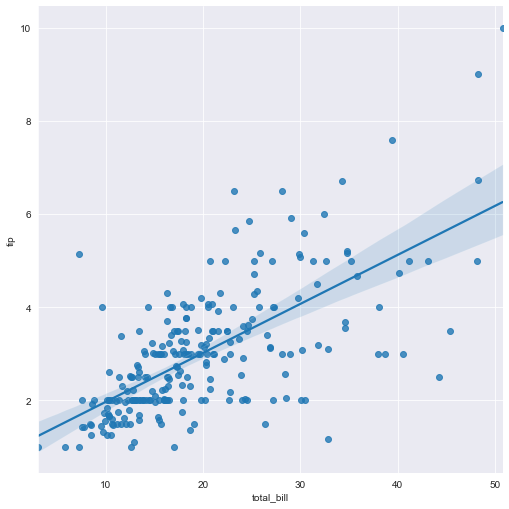

In [40]:
sns.set_style("darkgrid")
# lmplot은 scatter diagram(산포도), regression line(회귀선) 및 유효범위를 함께 그림
# 총액 대 팁
sns.lmplot(x="total_bill", y="tip", data=tips, height=7)  # x 축은 총액, y 축은 팁, height는 차트의 inch 크기
plt.show()

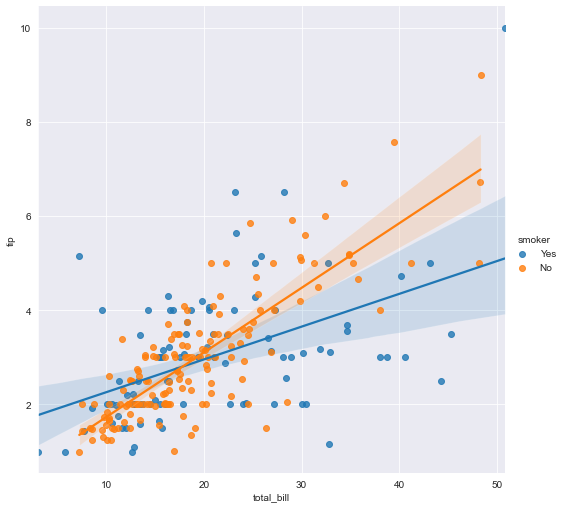

In [41]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, height=7)  # 비흡연자가 주황색으로(?)
plt.show()

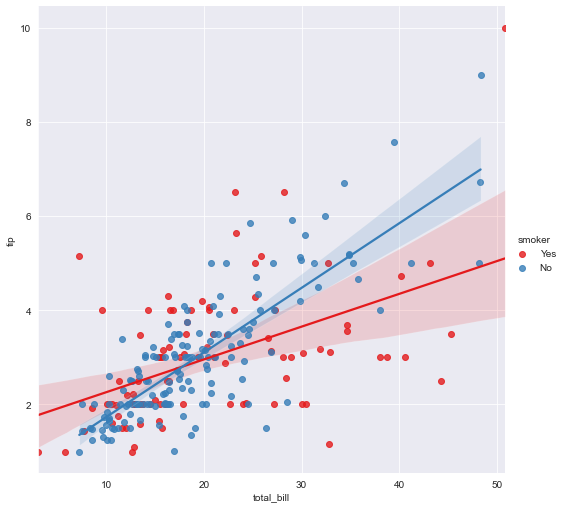

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           palette="Set1", height=7)                         # 색상 파렛트 지정하여, 흡연자를 빨간색으로!
plt.show()                                                   # 흡연자의 추세선 범위가 비흡연자의 추세선 범위보다 넓다!

### sns.heatmap()

In [43]:
uniform_data = np.random.rand(10, 12)  # 표준정규분포로부터 난수를 10행, 12열 배열로 생성 (0~1 사이)
uniform_data

array([[0.48970638, 0.13620198, 0.43512378, 0.94310667, 0.3060858 ,
        0.52707114, 0.81363168, 0.67212662, 0.78132888, 0.13927122,
        0.46940063, 0.23734816],
       [0.4861438 , 0.46692122, 0.98020314, 0.27675539, 0.98265041,
        0.405428  , 0.92178853, 0.08429844, 0.05674223, 0.97345099,
        0.3811509 , 0.18690861],
       [0.43468703, 0.38465768, 0.98620963, 0.55374315, 0.02932372,
        0.91175838, 0.44156461, 0.74854894, 0.36327504, 0.85027584,
        0.16826513, 0.38338109],
       [0.59177083, 0.68069357, 0.22400384, 0.22725009, 0.36911117,
        0.77234066, 0.50112287, 0.71702344, 0.62994449, 0.94347194,
        0.32363822, 0.62481257],
       [0.43412367, 0.19763318, 0.44241733, 0.15153656, 0.19399077,
        0.5480885 , 0.05450525, 0.40153183, 0.75820658, 0.30814142,
        0.06672944, 0.88929932],
       [0.03736229, 0.11803766, 0.81898225, 0.3343198 , 0.83078068,
        0.64326443, 0.77479729, 0.95163371, 0.57554996, 0.58580725,
        0.47045378,

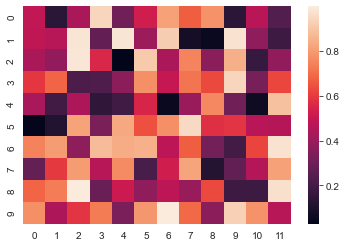

In [44]:
# 10x12 수치에 대한 heatmap 및 colormap

sns.heatmap(uniform_data)  # 생성한 난수로 heatmap 생성
plt.show()

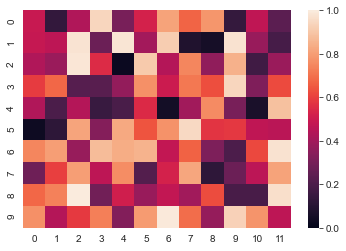

In [45]:
sns.heatmap(uniform_data,
            vmin=0, vmax=1)  # colormap 최소치 및 최대치
plt.show()

In [46]:
# flights 데이터 셋

flights = sns.load_dataset("flights")
print(flights.shape)
flights.head(5)

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
flights.month

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [48]:
# pandas.DataFrame.pivot()

flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


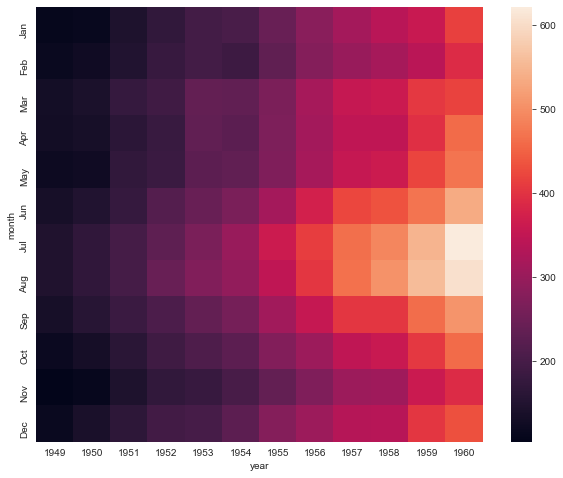

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(flights)
plt.show()

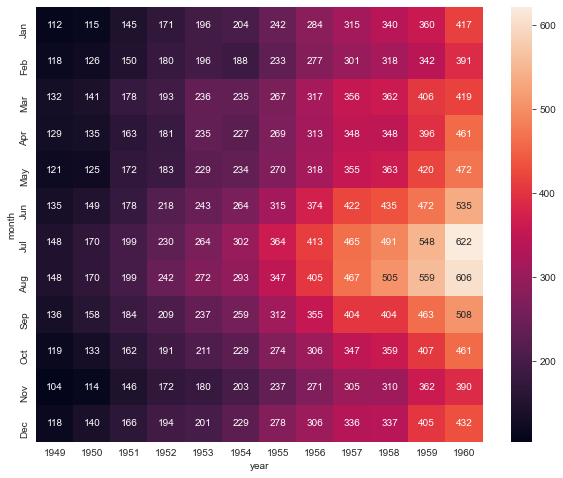

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(flights,         # 셀 마다 정수 형태로 주석(레이블)을 닮
            annot=True,     # If True, write the data value in each cell.  # 레이블을 닮
            fmt="d")         # String formatting code to use when adding annotations.  # 포맷은 정수(d)
plt.show()

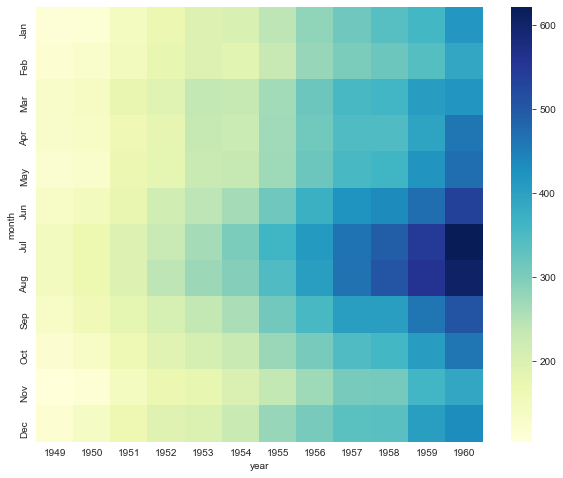

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, cmap="YlGnBu")  # [seaborn cmap](https://rfriend.tistory.com/419)
plt.show()

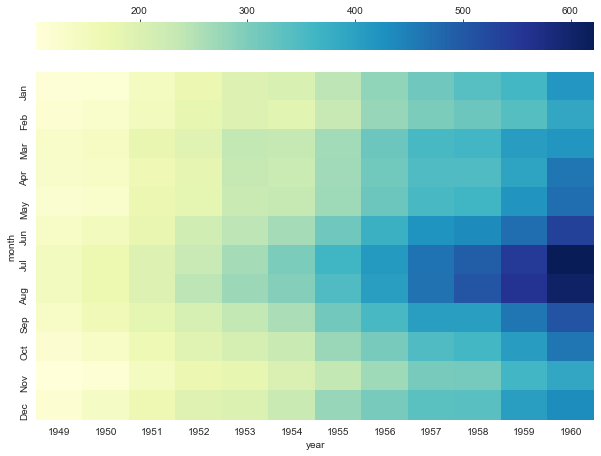

In [52]:
plt.figure(figsize=(10,8))
# sns.heatmap(flights, cmap="YlGnBu", cbar_kws=dict(use_gridspec=False, location="top"))
sns.heatmap(flights, cmap="YlGnBu", cbar_kws={"use_gridspec":False, "location":"top"})  # 컬러바를 상단에 출력
# [seaborn-heatmap-tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)
plt.show()

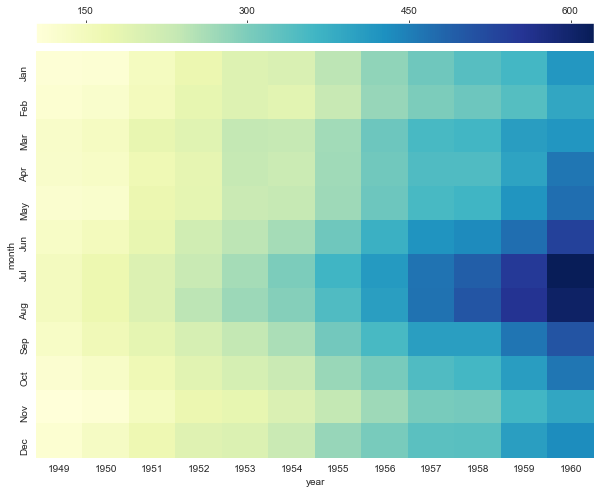

In [53]:
import warnings

warnings.filterwarnings("ignore",category=UserWarning)  # 경고를 억제

# [tight_layout_guide](https://matplotlib.org/3.2.1/tutorials/intermediate/tight_layout_guide.html#use-with-gridspec)
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
# from matplotlib import colorbar

plt.figure(figsize=(10,8))
# Create data
df = flights

# Use axes divider to put cbar on top
# plot heatmap without colorbar
ax = sns.heatmap(df, cmap="YlGnBu", cbar = False)
# split axes of heatmap to put colorbar
ax_divider = make_axes_locatable(ax)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size = '5%', pad = '2%')
# make colorbar for heatmap.
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
colorbar(ax.get_children()[0], cax = cax, orientation = 'horizontal')
# locate colorbar ticks
cax.xaxis.set_ticks_position('top')

plt.show()

### sns.pairplot()

- iris 데이터 셋

![](https://cdn.britannica.com/s:500x350/39/91239-004-44353E32/Diagram-flowering-plant.jpg)

In [54]:
iris = sns.load_dataset("iris")  # iris라는 데이터를 load 시킴
print(iris.shape)
iris.head(10)

# (꽃받침_길이, 꽃받침_너비, 꽃잎_길이, 꽃잎_너비, 종(setosa/versicolor/virginica))

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


- [다차원 실수형 데이터](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)를 위한 [seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)
    - 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용
    - pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그림
    - 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그림

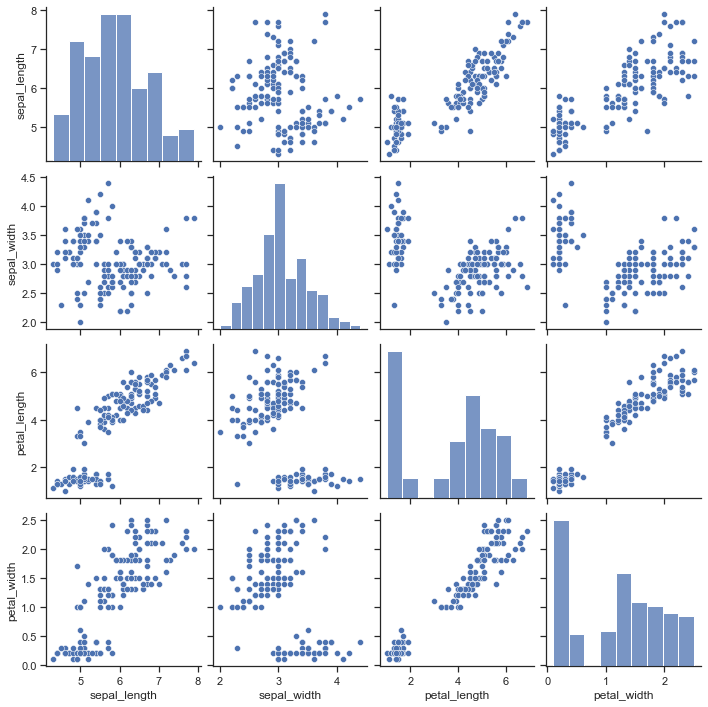

In [55]:
sns.set(style="ticks")  # Axes style parameters (축마다 눈금을 표시하라는 의미)

sns.pairplot(iris)

plt.show()

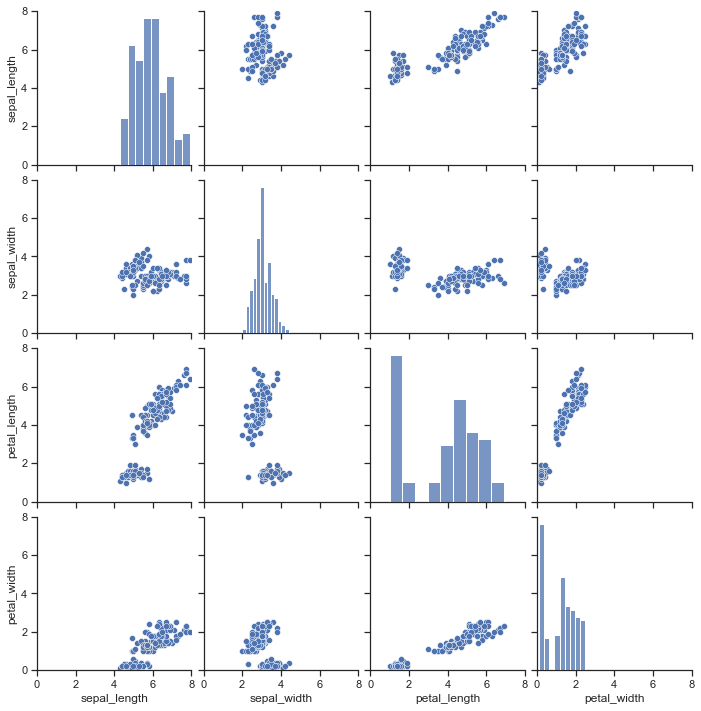

In [56]:
sns.set(style="ticks")  # Axes style parameters (축마다 눈금을 표시하라는 의미)

g = sns.pairplot(iris)
g.set(ylim=(0, 8), xlim=(0, 8))  # 축 범위를 통일
plt.show()

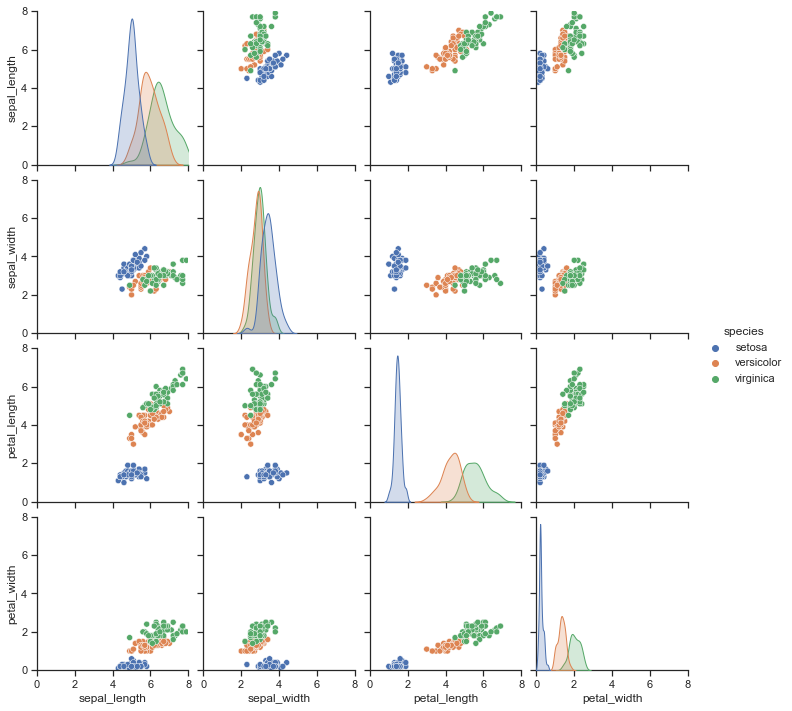

In [57]:
g = sns.pairplot(iris, hue="species")  # hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게
g.set(ylim=(0, 8), xlim=(0, 8))  # 축 범위를 통일

plt.show()

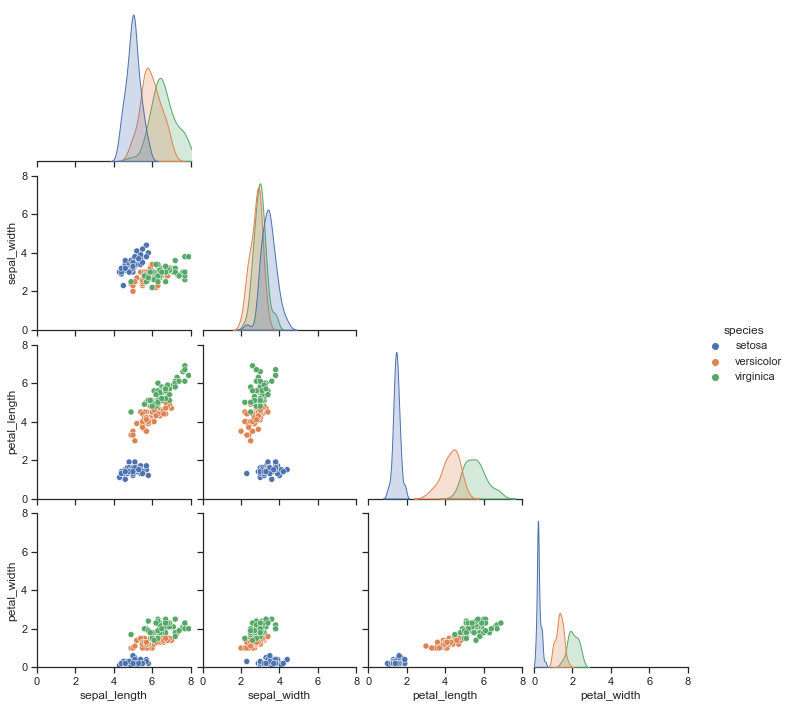

In [58]:
g = sns.pairplot(iris, hue="species", corner=True)  # 대각선 중심으로 중복 제거, 대칭으로 중복이기 때문
g.set(ylim=(0, 8), xlim=(0, 8))  # 축 범위를 통일

plt.show()

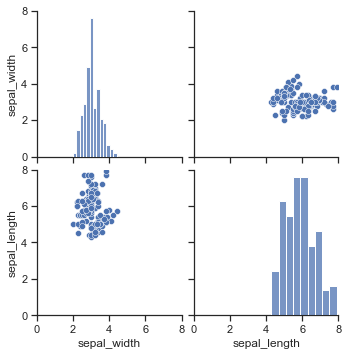

In [59]:
g = sns.pairplot(iris,
             vars=["sepal_width", "sepal_length"])  # pair(쌍)plot 변수를 제한
g.set(ylim=(0, 8), xlim=(0, 8))  # 축 범위를 통일
plt.show()

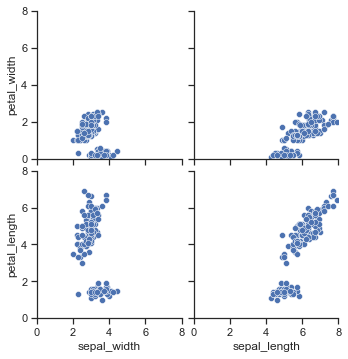

In [60]:
g = sns.pairplot(iris,
             x_vars=["sepal_width", "sepal_length"],   # 꽃받침
             y_vars=["petal_width", "petal_length"],   # 꽃잎
             diag_kind=None)                          # 이 옵션을 지정해야 대각선 상 차트가 출력됨!!!
g.set(ylim=(0, 8), xlim=(0, 8))  # 축 범위를 통일
plt.show()

### Anscombe's Quartet

- [데이터 시각화의 중요성](https://blog.naver.com/datageeks/221009326755)
    - 통계적 요약 값이 동일하지만, 데이터 모습이 완전히 다를 수 있다는 점
    - 데이터 시각화를 통해 산포도를 확인하는 것이 중요하다는 의미
    - “요약된 통계를 신뢰하지 말고 항상 데이터를 시각화 하십시오.”
    ![](https://mblogthumb-phinf.pstatic.net/MjAxNzA5MDlfMjcx/MDAxNTA0ODg1ODIyMTky.dFOSFlEfQEf_w_dlyhLvZuNCIubRa8H6mWb0oKfLNAYg.Xhi6ujFTefsrKoMtKAdw8X7e4o8MYP6iLGAtjOhyzkog.PNG.datageeks/Anscombe_1_0.png?type=w800)
    ![](https://mblogthumb-phinf.pstatic.net/MjAxNzA5MDlfMTI1/MDAxNTA0ODg1ODM3MTIz.5znJtOuUUEhpo1wbX75I5NmwnennCjLQ7ArSbifQh18g.HSQ7zmDdAUtwx2rgmd5gsIWnZXj-Paz7sNmbyPCJG5Yg.PNG.datageeks/AllDinosGrey_1.png?type=w800)

In [61]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(5)

,dataset,x,y
0,I,10.00,8.04
1,I,8.00,6.95
2,I,13.00,7.58
3,I,9.00,8.81
4,I,11.00,8.33


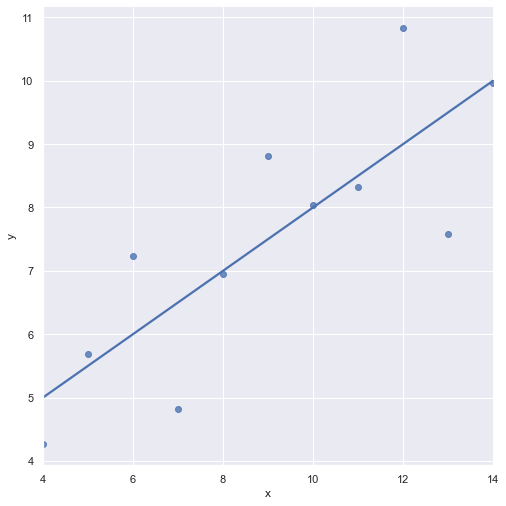

In [62]:
sns.set_style("darkgrid")

sns.lmplot(x="x", y="y",
           # pandas의 기능 중 하나인 query를 사용하면 쉽게 데이터중 일부를 추출할 수 있음
           data=anscombe.query("dataset == 'I'"),
           # confidence interval
           ci=None,  # 실내구간을 그리지 말라는 뜻
           height=7)
plt.show()

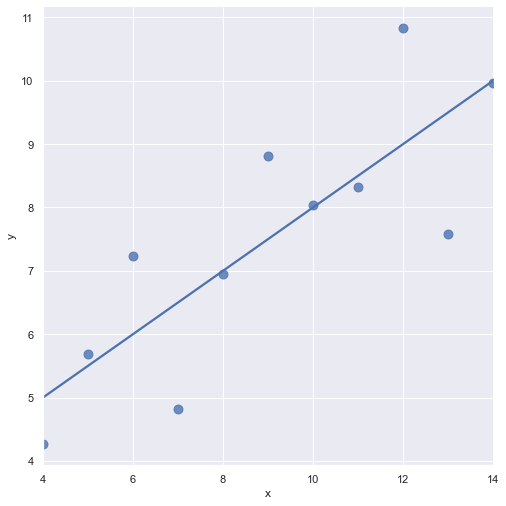

In [63]:
sns.lmplot(x="x", y="y",
           data=anscombe.query("dataset == 'I'"),
           ci=None,
           scatter_kws={"s": 80},  # 점의 속성만 바꾸려면 scatter_kws에 설정값을 사전 형태로 넘김, 점의 크기를 80으로 지정
           height=7)
plt.show()

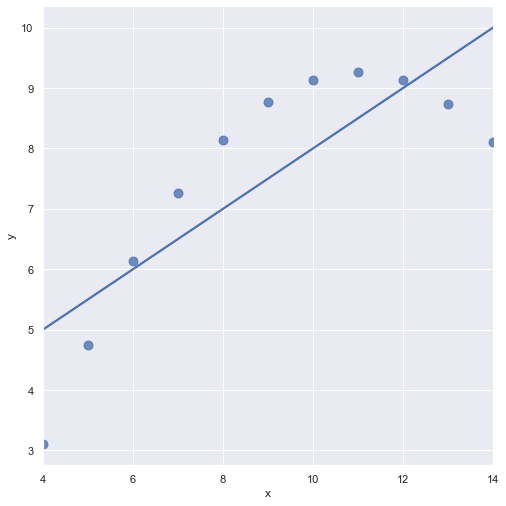

In [64]:
sns.lmplot(x="x", y="y",
           data=anscombe.query("dataset == 'II'"),
           # 회귀선 차수를 1차원으로 지정하여, 선형 회귀선
           order=1,
           ci=None,
           scatter_kws={"s": 80},
           height=7)
plt.show()
# 직선 회귀선이 부적합한 경우

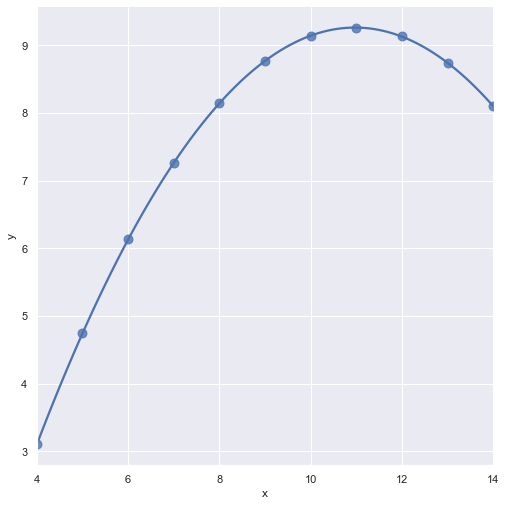

In [65]:
sns.lmplot(x="x", y="y",
           data=anscombe.query("dataset == 'II'"),
           # 회귀선 차수를 2차원로 지정, 더 둥글게 그려짐
           order=2,
           ci=None,
           scatter_kws={"s": 80},
           height=7)
plt.show()

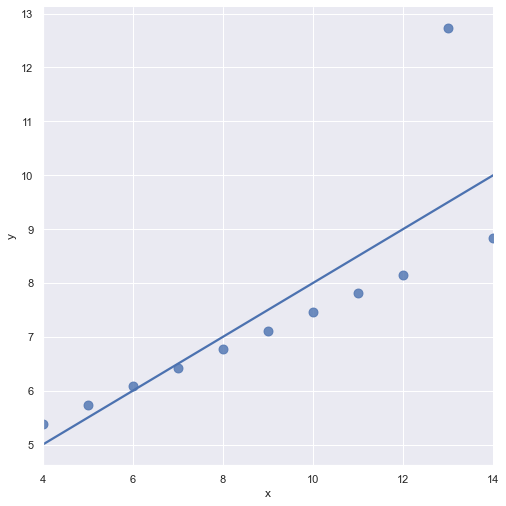

In [66]:
sns.lmplot(x="x", y="y",
           data=anscombe.query("dataset == 'III'"),
           ci=None,
           scatter_kws={"s": 80},
           height=7)
plt.show()
# 너무 튀는 한 건의 데이터때문에 회귀선이 전체적으로 왜곡된 현상

In [67]:
# 이 작업도 불필요함 (vnv_vd 가상환경에 이미 포함되어 있음)
# !conda install statsmodels -y

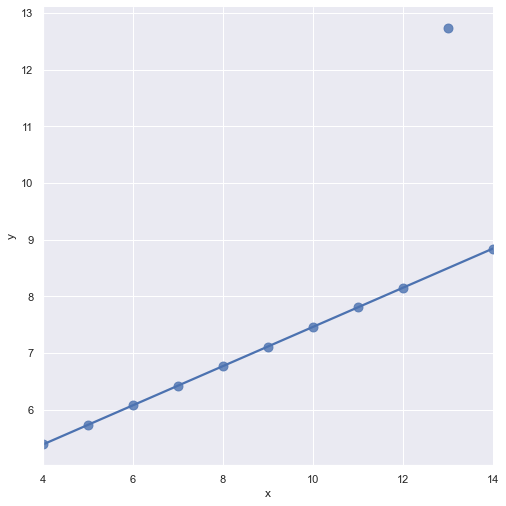

In [68]:
sns.lmplot(x="x", y="y",
           data=anscombe.query("dataset == 'III'"),
           # statsmodels 패키지에서 제공하는 robust 옵션을 이용해서 이상치 데이터는 무시하도록 지정
           robust=True,
           ci=None,
           scatter_kws={"s": 80},
           height=7)
plt.show()

### seaborn 관련 추천 자료

- seaborn, [Example gellery](https://seaborn.pydata.org/examples/index.html)
- seaborn, [An introduction to seaborn](https://seaborn.pydata.org/introduction.html)
- seaborn, [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
- seaborn, [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)   

## 지도 시각화 도구 Folium 공부
- folium을 이용한 [지리정보 시각화](https://oboki.net/workspace/programming/language/python/folium-지리정보-시각화/)
- [folium 의 plugins 패키지 샘플 살펴보기](https://dailyheumsi.tistory.com/85)
- [folium 문서](https://python-visualization.github.io/folium/)

### Folium 소개

In [69]:
# folium 패키지 설치 여부 확인
!conda list folium

# packages in environment at C:\anaconda3:
#
# Name                    Version                   Build  Channel
folium                    0.11.0                     py_0    conda-forge


In [70]:
# 설치되어 있지 않다면, folium 패키지 설치 ('-y' 옵션을 지정!)
#!conda install -c conda-forge folium -y

In [71]:
import folium

In [72]:
# 한양여대 지도 출력
map_hwu = folium.Map(location=[37.558327, 127.049864])  # 한얀여대 좌표는 구글 지도에서 구하여 입력
map_hwu  # 아래 지도를 확대하면 한양여대가 나오지만, 초기 배율을 지정할 수 있다면... 

- 구글 지도에서 장소를 검색하고, `이곳이 궁금한가요?` 메뉴를 활용하여 좌표를 구할 수 있음
![googlemap](https://user-images.githubusercontent.com/10287629/97767731-7003b180-1b61-11eb-9260-00145a7eba59.png)

In [73]:
# zoom_start 매개변수로 초기 배율 지정
map_hwu = folium.Map(location=[37.558327, 127.049864], zoom_start=20)
map_hwu

### Folium 지도 유형(tiles) 지정
- “OpenStreetMap”
- “Mapbox Bright” (Limited levels of zoom for free tiles)
- “Mapbox Control Room” (Limited levels of zoom for free tiles)
- “Stamen” (Terrain, Toner, and Watercolor)
- “Cloudmade” (Must pass API key)
- “Mapbox” (Must pass API key)
- “CartoDB” (positron and dark_matter)

In [74]:
# tiles 지정
map_hwu = folium.Map(location=[37.558327, 127.049864],
                    tiles='OpenStreetMap',  # 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'CartoDB Positron', 'CartoDB Dark_matter'
                    zoom_start=16)
map_hwu

In [75]:
# 운영체제에 맞는 글꼴 지정
import platform

path = "c:/Windows/Fonts/gulim.ttc"  # malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('윈도우 운영체제: ' + font_name )
else:
    print('Unknown system... sorry~~~~')

윈도우 운영체제: Gulim


### Folium 한글 문제

- folium 한글 깨지는 문제 해결을 위해서 아래 명령을 아나콘다 파워 쉘 프롬프트에서 실행
- 한글 깨짐 현상의 완벽한 해결이 되지 않고 있음
```
pip install git+https://github.com/python-visualization/branca.git@master
```

### Folium 마커/아이콘 활용

In [76]:
# folium.Marker()

map_1 = folium.Map(location=[37.463714, 127.039716],        # 양재IC
                   zoom_start=11,
                   tiles='Stamen Terrain')
folium.Marker([37.558327, 127.049864], popup='한양대학교 Hanyang University',
              icon=folium.Icon(icon='cloud')).add_to(map_1)  # add_to -> 아이콘을 map1 지도에 추가
folium.Marker([37.463714, 127.039716], popup='양재 IC',
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.389567, 126.979840], popup='내동초등학교 Elementary School',
              icon=folium.Icon(icon='cloud')).add_to(map_1)

# map_1.save('./markers.html')  # html 파일로 저장
map_1

In [77]:
# folium.Marker()

map_1 = folium.Map(location=[38.121777, 128.465816],  # 설악산
                   zoom_start=12,
                   tiles='Stamen Terrain')
folium.Marker([38.106290, 128.456888], popup='설악폭포 Seorak Falls',
              icon=folium.Icon(color='green')).add_to(map_1)  # 초록색 마커
folium.Marker([38.121011, 128.464909], popup='대청봉 Daecheongbong Peak',
              icon=folium.Icon(icon='cloud')).add_to(map_1)   # 구름모양 마커
folium.Marker([38.166575, 128.373433], popup='백담사 BaekdamSa Temple',
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)  # 빨간색 정보 아이콘 마커
map_1

In [78]:
# folium.CircleMarker()

map_2 = folium.Map(location=[37.566691, 126.977905],  # 서울시청
                   tiles='Stamen Toner',
                   zoom_start=14)
folium.Marker([37.566034, 126.975135], popup='덕수궁 Deoksugung Palace' ).add_to(map_2)
folium.CircleMarker([37.579770, 126.977041],
                    radius=45,
                    popup='경복궁 Kyeongbokgung Palace',
                    color='#3186cc',
                    fill_color='#3186cc', ).add_to(map_2)
map_2

In [79]:
# folium.RegularPolygonMarker()

map_5 = folium.Map(location=[37.534195, 127.044293], zoom_start=14)    # 네 다리의 중간 지점
folium.RegularPolygonMarker([37.536141, 127.020909],
                            popup='동호대교 Donghodaegyo Bridge', fill_color='#132b5e',
                            number_of_sides=3, radius=10).add_to(map_5)
folium.RegularPolygonMarker([37.538201, 127.034550],
                            popup='성수대교 Seongsudaegyo Bridge', fill_color='#45647d',
                            number_of_sides=4, radius=10).add_to(map_5)
folium.RegularPolygonMarker([37.530246, 127.057213],
                            popup='영동대교 Yeongdongdaegyo Bridge', fill_color='#769d96',
                            number_of_sides=6, radius=10).add_to(map_5)
folium.RegularPolygonMarker([37.527212, 127.064502],
                            popup='청담대교 Cheongdamdaegyo Bridge', fill_color='#769d96',
                            number_of_sides=8, radius=10).add_to(map_5)
map_5.save('index.html')
map_5

### Folium 지도 경계선 표시

- folium 지도에 영역 경계선 표시
    - GeoJson 데이터 파일
    - folium.GeoJson() 함수
    
- GeoJson 데이터 파일
    - 대한민국 지도 https://github.com/southkorea/southkorea-maps
    - 서울 지도 https://github.com/southkorea/seoul-maps
    - 서울시 행정구역 경계 https://data.seoul.go.kr/dataList/OA-11676/S/1/datasetView.do
    - 대한민국 행정동 경계 https://github.com/vuski/admdongkor
    - 대한민국 시도 시군구 경계 https://neurowhai.tistory.com/350
    - 대한민국 시군구 경계 https://data-esrikrmkt.opendata.arcgis.com/datasets/11ea494cd9594f3a95baf4d45fcf3a7f_0/data
    - 미국 주 경계 https://github.com/python-visualization/folium/tree/master/examples/data
    
- 경계선을 추상화 하는 사례
[시각화하기 좋은 우리나라 지도 그리는 법](https://pinkwink.kr/1005)    

In [80]:
# folium.GeoJson(json.loads(requests.get()))
import os
import json
import requests
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'  # GeoJson 데이터 파일 제공 URL
us_states = f'{url}/us-states.json'  # GeoJson 데이터 파일의 전체 경로
print(us_states)
geo_json_data = json.loads(requests.get(us_states).text)
m = folium.Map([43, -100], zoom_start=4)
folium.GeoJson(geo_json_data).add_to(m)
m.save(os.path.join('.', 'GeoJSON_and_choropleth_0.html'))
m

https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json


### 단계구분지도 Choropleth 작성

- 미국 지도에 주 경계선 표시
- 주별 실업률을 기준으로 주 영역에 색상 단계를 구분하여 표시

In [81]:
import folium
import pandas as pd

In [82]:
state_unemployment = './folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.10
1,AK,6.80
2,AZ,8.10
3,AR,7.20
4,CA,10.10


In [83]:
# folium.Map().choropleth() 활용하여, 미국 실업율 단계구분도 작성
state_geo = './folium_us-states.json'
map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo,                   # GeoJson 경계 데이터   
               data=state_data,                      # 주별 실업률 df 
               columns=['State', 'Unemployment'],    # 주별 실업률 df 열
               key_on='feature.id',                  # GeoJson 경계 데이터에서 State 코드를 저장한 필드 
               fill_color='PuRd',                    # 단계구분지도에 채울 색상
               legend_name='Unemployment Rate (%)')  # 범례에 표시할 레이블 
map